s11
s21
m11
m21
s12
s22
m12
m22
s13
s23
m13
m23
s14
s24
m14
m24
s15
s25
m15
m25


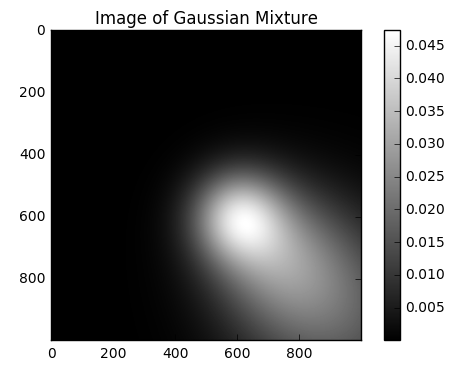

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import numpy.linalg as LA
z = [0,0,0,0,0]
w = [.2,.2,.2,.2,.2]
for i in range(0,5):
    s1 = float(input('s1'))
    s2 = float(input('s2'))
    m1 = float(input('m1'))
    m2 = float(input('m2'))
    t1 = 1/s1
    t2 = 1/s2
    points = np.arange(-5,5,0.01)
    x1, x2 = np.meshgrid(points, points)
    sigma = np.array([[s1,0],[0,s2]])
    z[i] = np.exp(-.5*(t1*((x1-m1)**2)+t2*((x2-m2)**2)))/(2*np.pi*np.sqrt(LA.det(sigma)))
    
%matplotlib inline
plt.imshow(w[0] * z[0]+w[1] *z[1]+w[2]*z[2]+w[3]*z[3]+w[4]*z[4],cmap = plt.cm.gray); plt.colorbar()
plt.title("Image of Gaussian Mixture")

In [11]:
# part 2 of the assignment
import pandas.io.data as web
import pandas as pd

all_data = {}
for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']:
    all_data[ticker] = web.get_data_yahoo(ticker)
price = pd.DataFrame({tic: data['Adj Close'] for tic, data in all_data.items()})
volume = pd.DataFrame({tic: data['Volume'] for tic, data in all_data.items()})
returns = price.pct_change()
returns.tail()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2016-10-20,-0.000512,-0.005652,0.001719,-0.004867
2016-10-21,-0.003930,0.003011,-0.012474,0.042096
2016-10-24,0.009005,0.017189,0.006282,0.022461
2016-10-25,0.005100,-0.006690,0.002059,-0.000164
2016-10-26,-0.022495,-0.010648,0.006164,-0.005903


In [12]:
returns.MSFT.corr(returns.IBM)

0.49963916015016552

In [13]:
returns.MSFT.cov(returns.IBM)

8.8605135938648599e-05

In [14]:
returns.corr()

,AAPL,GOOG,IBM,MSFT
AAPL,1.000000,0.408246,0.386262,0.389937
GOOG,0.408246,1.000000,0.404883,0.466449
IBM,0.386262,0.404883,1.000000,0.499639
MSFT,0.389937,0.466449,0.499639,1.000000


In [15]:
returns.cov()

,AAPL,GOOG,IBM,MSFT
AAPL,0.000277,0.000107,0.000078,0.000095
GOOG,0.000107,0.000250,0.000077,0.000108
IBM,0.000078,0.000077,0.000146,0.000089
MSFT,0.000095,0.000108,0.000089,0.000215


In [16]:
returns.corrwith(returns.IBM)

AAPL    0.386262
GOOG    0.404883
IBM     1.000000
MSFT    0.499639
dtype: float64

In [17]:
returns.corrwith(volume)

AAPL   -0.075504
GOOG   -0.006836
IBM    -0.205222
MSFT   -0.092305
dtype: float64

In [19]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
uniques = obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [20]:
obj.value_counts()

c    3
a    3
b    2
d    1
dtype: int64

In [21]:
pd.value_counts(obj.values, sort=False)

d    1
b    2
a    3
c    3
dtype: int64

In [23]:
mask = obj.isin(['b', 'c'])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [24]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

In [26]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
.....:                   'Qu2': [2, 3, 1, 2, 3],
.....:                   'Qu3': [1, 5, 2, 4, 4]})

In [27]:
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [28]:
result = data.apply(pd.value_counts).fillna(0)
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0
